## Project 2

Scraping Data from Websites

In [482]:
from __future__ import print_function, division

In [483]:
import pandas as pd
import unicodedata
import numpy as np

_____
### State ranking data

In [484]:
import requests

url = 'https://wallethub.com/edu/states-with-the-best-schools/5335/'

response = requests.get(url)

In [485]:
page = response.text

In [486]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page,"lxml")

In [487]:
rank_dict = {}

for i in range(51):
    rank = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[5*i].text
    state = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[1+5*i].text
    state = state.replace(' ','')
    score = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[2+5*i].text
    quality = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[3+5*i].text
    safety = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[4+5*i].text
    rank_dict[rank] = [state,float(score),int(quality),int(safety)]

In [488]:
df_rank = pd.DataFrame.from_dict(rank_dict, orient='index', dtype=None)
df_rank.rename(index=str, columns={0: 'State', 1: 'Overall_score',2:'Quality_score', 
                                   3:'Safety_score'}, inplace = True)

##### State Rank data frame

In [489]:
df_rank.sample(10)

,State,Overall_score,Quality_score,Safety_score
7,Minnesota,62.68,7,18
15,Kansas,56.24,23,16
37,SouthDakota,47.40,34,39
9,Iowa,61.06,11,9
50,NewMexico,34.79,51,40
43,Oregon,40.38,41,48
28,California,51.45,39,13
31,Missouri,50.94,25,36
10,Maine,59.93,16,4
21,Florida,54.02,31,12


____
### State budget data

In [490]:
url = 'https://en.wikipedia.org/wiki/List_of_U.S._state_budgets'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page,"lxml")

In [491]:
budget_dict = {}

for i in range(50):
    state = soup.find(class_='mw-parser-output').find_all('td')[6*i].text
    state = state.replace(' ','')
    
    budget = soup.find(class_='mw-parser-output').find_all('td')[1+6*i].text
    budget = float(budget)
    
    fy = soup.find(class_='mw-parser-output').find_all('td')[2+6*i].text
    loc = fy.find('–')
    if fy.find('–') != -1:
        front = int(fy[:loc])
        back = int('20' + fy[loc+1:])
        years = back - front + 1
    else: 
        back = int(fy)
        years = 1
    
    budget_per_capita = soup.find(class_='mw-parser-output').find_all('td')[4+6*i].text
    budget_per_capita = int(budget_per_capita.replace(',',''))
    
    credit_rating = soup.find(class_='mw-parser-output').find_all('td')[5+6*i].text
    
    budget_dict[state] = [budget,back,years,budget_per_capita,credit_rating]

In [492]:
df_budget = pd.DataFrame.from_dict(budget_dict, orient='index', dtype=None)
df_budget.rename(index=str, columns={0: 'Budget_billion', 1: 'Year_end',2:'No_years', 3:'Per_capita',
                                     4:'Credit_rating'}, inplace = True)

In [493]:
df_budget = df_budget.reset_index(level=0)
df_budget.rename(columns = {'index' : 'State'}, inplace = True)

##### State Budget data drame

In [494]:
df_budget

,State,Budget_billion,Year_end,No_years,Per_capita,Credit_rating
0,Alabama,30.0,2017,1,6009,AA
1,Alaska,7.2,2017,1,9750,AA
2,Arizona,36.6,2017,1,5360,AA
3,Arkansas,28.6,2016,1,9603,AA
4,California,170.9,2017,2,4366,AA-
5,Colorado,27.1,2017,2,4966,AA
6,Connecticut,20.4,2017,1,5681,AA-
7,Delaware,4.1,2017,1,4334,AAA
8,Florida,92.3,2017,1,4553,AAA
9,Georgia,23.7,2017,1,2320,AAA


____
### Teacher salary data

In [495]:
from urllib.request import Request, urlopen

site= "https://articles.niche.com/teacher-salaries-in-america/"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page,'lxml')

In [496]:
salary_dict = {}

for i in range(50):
    state = soup.find(class_='table-wrap ').find_all('td')[3*i].text
    state = state.replace('\n','').replace('State','').replace(' ','')
    
    start_salary = soup.find(class_='table-wrap ').find_all('td')[3*i + 1].text
    start_salary = int(start_salary.replace('\n','').replace('Average Starting Salary','')
                       .replace(',','').replace('$',''))
    
    salary = soup.find(class_='table-wrap ').find_all('td')[3*i + 2].text
    salary = int(salary.replace('\n','').replace('Average Salary','').replace(',','').replace('$',''))
    
    salary_dict[state] = [start_salary, salary]

In [497]:
df_salary = pd.DataFrame.from_dict(salary_dict, orient='index', dtype=None)
df_salary.rename(index=str, columns={0: 'Starting_salary', 1: 'Salary'}, inplace = True)

In [498]:
df_salary = df_salary.reset_index(level=0)
df_salary.rename(columns = {'index' : 'State'}, inplace = True)

##### Teacher Salary data frame

In [499]:
df_salary.sample(10)

,State,Starting_salary,Salary
45,Vermont,38483,60187
33,NorthCarolina,37514,49837
49,Wisconsin,36983,54998
0,Alabama,38477,48868
21,Massachusetts,44726,77804
28,Nevada,37973,57376
11,Hawaii,45963,57674
25,Missouri,31842,48293
19,Maine,33876,51077
46,Virginia,39398,51049


___
### Medium Income

In [500]:
url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_by_income'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page,"lxml")

In [501]:
income_dict = {}

for i in range(54):
    rank = soup.find(class_='mw-parser-output').find_all('td')[6+7*i].text
    if rank:
        state = soup.find(class_='mw-parser-output').find_all('td')[7+7*i].text
        state = state.replace(' ','')
        income = soup.find(class_='mw-parser-output').find_all('td')[8+7*i].text
        income = int(income.replace(',','').replace('$',''))
        income_dict[rank] = [state, income]
    

In [502]:
df_income = pd.DataFrame.from_dict(income_dict, orient='index', dtype=None)
df_income.rename(index=str, columns={0: 'State', 1: 'Income'}, inplace = True)

##### Income data frame

In [503]:
df_income.sample(10)

,State,Income
24,Nebraska,54996
16,NorthDakota,60557
22,Texas,55653
13,Utah,62912
5,Connecticut,71346
4,NewJersey,72222
8,Virginia,66262
42,Tennessee,47275
21,Pennsylvania,55702
10,Washington,64129


___ 
### Class Size

In [504]:
url = 'https://nces.ed.gov/surveys/sass/tables/sass1112_2013314_t1s_007.asp'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page,"lxml")

In [505]:
class_size_dict = {}

for i in range(60):
    warning = ''
    state = soup.find('tbody').find_all('th')[2+i].text
    state = state.replace('\r','').replace('\n','').replace(' ','')
    state = state.strip()
    if state: # ignores blank cells
        
        # Primary School
        PS_selfcont = soup.find('tbody').find_all('td')[32+16*i].text
        if PS_selfcont == '‡': PS_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[33+16*i].text
        if warning == '!': PS_selfcont = '0'
        PS_selfcont = float(PS_selfcont)
        
        PS_dep = soup.find('tbody').find_all('td')[34+16*i].text
        if PS_dep == '‡': PS_dep = '0'
        warning = soup.find('tbody').find_all('td')[35+16*i].text
        if warning =='!': PS_dep = '0'
        PS_dep = float(PS_dep)
        
        # Middle School
        MS_selfcont = soup.find('tbody').find_all('td')[36+16*i].text
        if MS_selfcont == '‡': MS_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[37+16*i].text
        if warning == '!': MS_selfcont = '0'
        MS_selfcont = float(MS_selfcont)
        
        MS_dep = soup.find('tbody').find_all('td')[38+16*i].text
        if MS_dep == '‡': MS_dep = '0'
        warning = soup.find('tbody').find_all('td')[39+16*i].text
        if warning == '!': MS_dep = '0'
        MS_dep = float(MS_dep)
        
        # High School
        HS_selfcont = soup.find('tbody').find_all('td')[40+16*i].text
        if HS_selfcont == '‡': HS_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[41+16*i].text
        if warning == '!': HS_selfcont = '0'
        HS_selfcont = float(HS_selfcont)
        
        HS_dep = soup.find('tbody').find_all('td')[42+16*i].text
        if HS_dep == '‡': HS_dep = '0'
        warning = soup.find('tbody').find_all('td')[43+16*i].text
        if warning == '!': HS_dep = '0'
        HS_dep = float(HS_dep)
        
        # Combined Grades
        CG_selfcont = soup.find('tbody').find_all('td')[44+16*i].text
        if CG_selfcont == '‡': CG_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[45+16*i].text
        if warning == '!': CG_selfcont = '0'
        CG_selfcont = float(CG_selfcont)
        
        CG_dep = soup.find('tbody').find_all('td')[46+16*i].text
        if CG_dep == '‡': CG_dep = '0'
        warning = soup.find('tbody').find_all('td')[47+16*i].text
        if warning == '!': CG_dep = '0'
        CG_dep = float(CG_dep)

        class_size_dict[state] = [PS_selfcont, PS_dep, MS_selfcont, MS_dep, HS_selfcont, HS_dep, 
                                  CG_selfcont, CG_dep]

In [506]:
df_class_size = pd.DataFrame.from_dict(class_size_dict, orient='index', dtype=None)
df_class_size.rename(index=str, columns={0: 'Primary_SCC', 1: 'Primary_DI',2:'Middle_SCC',
                                         3:'Middle_DI',4:'High_SCC',5:'High_DI',6:'Combine_SCC',
                                         7:'Combine_DI'}, inplace = True)
df_class_size = df_class_size.reset_index(level=0)
df_class_size.rename(columns = {'index' : 'State'}, inplace = True)

##### Class Size Data Frame

In [507]:
df_class_size.sample(10)

,State,Primary_SCC,Primary_DI,Middle_SCC,Middle_DI,High_SCC,High_DI,Combine_SCC,Combine_DI
48,WestVirginia,19.2,27.8,0.0,23.5,0.0,19.8,0.0,20.3
47,Washington,23.9,37.0,29.1,27.0,28.5,27.0,17.7,15.4
15,Iowa,20.9,21.5,15.6,27.8,12.2,22.8,16.0,21.0
1,Alaska,21.1,17.4,4.0,21.8,0.0,20.3,13.4,10.2
14,Indiana,21.7,35.1,18.3,25.8,14.4,23.6,17.0,18.9
11,Hawaii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Michigan,25.7,36.0,25.2,28.0,27.8,27.3,13.8,20.4
41,SouthDakota,21.7,22.3,0.0,24.8,18.6,20.9,16.7,15.8
26,Montana,20.5,17.7,16.4,24.0,19.1,20.6,12.8,12.5
21,Massachusetts,20.1,32.2,16.5,25.0,15.4,22.0,0.0,19.3


___

### Data

##### data frame

In [508]:
df.sample()

NameError: name 'df' is not defined

____

### Testing relationships

#### Salary vs Rank

In [261]:
result = pd.merge(df_rank,df_salary,on='State')
result.head()

,State,Overall_score,Quality_score,Safety_score,Starting_salary,Salary
0,Massachusetts,78.16,1,1,44726,77804
1,NewJersey,66.92,2,15,51179,69623
2,NewHampshire,64.65,4,14,36845,57253
3,Wisconsin,64.25,6,7,36983,54998
4,Vermont,64.09,5,11,38483,60187


In [242]:
import matplotlib.pyplot as plt
%matplotlib inline

# Verify our versions
import matplotlib

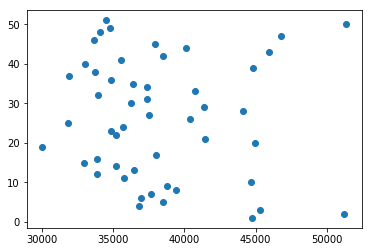

In [280]:
plt.scatter(result.Starting_salary,result.Quality_score)

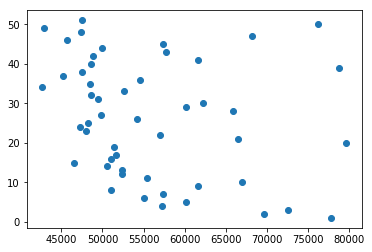

In [281]:
plt.scatter(result.Salary,result.Quality_score)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


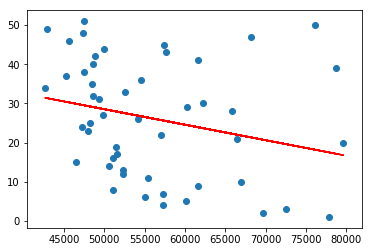

In [277]:
fig, ax = plt.subplots()
fit = np.polyfit(result.Salary, result.Quality_score, deg=1)
ax.plot(result.Salary, fit[0] * result.Salary + fit[1], color='red')
ax.scatter(result.Salary,result.Quality_score)

fig.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

#### Class size vs rank

In [259]:
result1 = pd.merge(df_rank[['State','Overall_score']],
                   df_class_size[['State','Combine_SCC','Combine_DI']],on='State')

In [260]:
result2 = pd.merge(df_rank[['State','Overall_score']],df_class_size[['State','High_SCC','High_DI']],on='State')

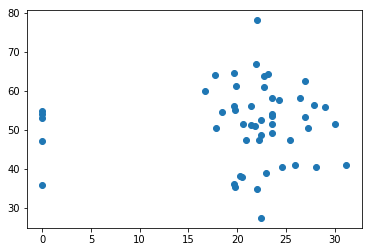

In [279]:
plt.scatter(result2.High_DI,result2.Overall_score)

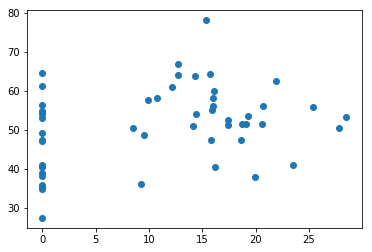

In [278]:
plt.scatter(result2.High_SCC,result2.Overall_score)